# Importing Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

### Linear Regression using First Principal

The best fit predicted linear line is :   Y = 21.69255319148936 + 3.470744680851064 X 
The Mean Absolute Error value is :  4.2234042553191475
The Mean Square Absolute Error value is :  22.307819148936154
The Root Mean Square Absolute Error value is :  4.72311540711596
The R2 value is : 0.9530598873223295


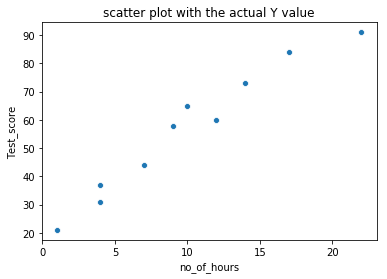

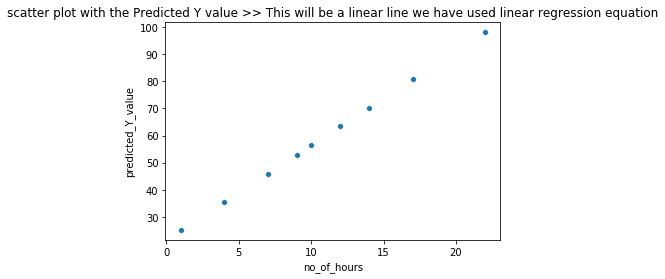

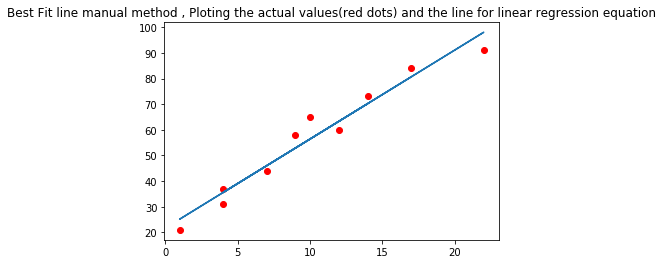

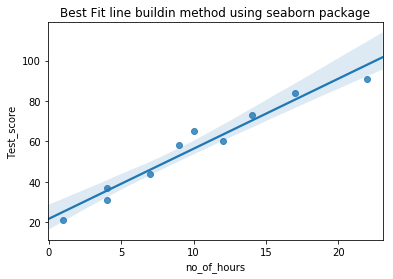

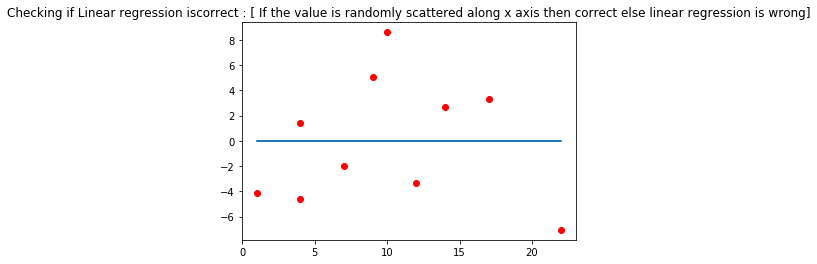

In [4]:

# Function to create linear regression 

def lin_reg_man( x , y  ):
    den = (x**2).sum() - len(x)*(x.mean()**2)
    num = (x * y).sum() - len(x)*x.mean()*y.mean()
    slope = num / den 
    intercept = y.mean() - slope * x.mean()
    return  intercept , slope , ' Y = '+str(intercept)+' + '+str(slope) + ' X '

# Function to calculate the error term

def error( x , y, intercept , slope):
    test_lin_reg1['predicted_Y_value'] = intercept + slope * x 
    test_lin_reg1['prediction_difference'] = y - test_lin_reg1['predicted_Y_value']
    test_lin_reg1['abs_prediction_difference'] = abs ( test_lin_reg1['predicted_Y_value'] - test_lin_reg1['Test_score'] )
    test_lin_reg1['square_difference'] = test_lin_reg1['abs_prediction_difference'] ** 2
    Mean_absolure_error = test_lin_reg1['abs_prediction_difference'].sum() / len(test_lin_reg1['abs_prediction_difference'])
    Mean_square_absolure_error = test_lin_reg1['square_difference'].sum() / len(test_lin_reg1['square_difference'])
    Mean_root_square_absolure_error = np.sqrt(Mean_square_absolure_error)
    return Mean_absolure_error , Mean_square_absolure_error , Mean_root_square_absolure_error , test_lin_reg1

def prob( y , test_lin_reg1 ):
    return 1 - ( sum(test_lin_reg1['prediction_difference']**2) / sum( (y-y.mean())**2 ) )

# Plotting sx
def plot_lin(x , y , test_lin_reg1):
    
    # scatter plot with the actual Y value 
    fig, ax = plt.subplots()
    ax.set_title('scatter plot with the actual Y value')
    sb.scatterplot(x,y)
    
    # scatter plot with the Predicted Y value 
    fig, ax = plt.subplots()
    ax.set_title('scatter plot with the Predicted Y value >> This will be a linear line we have used linear regression equation')
    sb.scatterplot( x = 'no_of_hours' , y = 'predicted_Y_value' , data = test_lin_reg1)
    
    # Best Fit line manual method
    fig, ax = plt.subplots()
    ax.set_title('Best Fit line manual method , Ploting the actual values(red dots) and the line for linear regression equation')
    plt.scatter(test_lin_reg1['no_of_hours'] , test_lin_reg1['Test_score'] , color = 'Red')
    plt.plot(test_lin_reg1['no_of_hours'] , test_lin_reg1['predicted_Y_value'])
    
    # Best Fit line buildin method
    fig, ax = plt.subplots()
    ax.set_title('Best Fit line buildin method using seaborn package')
    sb.regplot( x = 'no_of_hours' , y = 'Test_score' , data = test_lin_reg1)
    
    # To Check if my linear regression is correct
    fig,ax = plt.subplots()
    ax.set_title('Checking if Linear regression iscorrect : [ If the value is randomly scattered along x axis then correct else linear regression is wrong]')
    plt.scatter( x = 'no_of_hours' , y = 'prediction_difference' , data = test_lin_reg1 , color = 'red')
    plt.plot( x , x*0)
    
def summary_lin_reg( x , y , df ) :
    intercept , slope ,lin_reg_equ  = lin_reg_man( x , y )
    print('The best fit predicted linear line is : ',lin_reg_equ)
    Mean_absolure_error , Mean_square_absolure_error , Mean_root_square_absolure_error ,new_df = error( x , y , intercept , slope)
    print('The Mean Absolute Error value is : ' ,Mean_absolure_error )
    print('The Mean Square Absolute Error value is : ' ,Mean_square_absolure_error )
    print('The Root Mean Square Absolute Error value is : ' ,Mean_root_square_absolure_error )
    print('The R2 value is :' ,  prob(y,df) )
    plot_lin(x , y , df)
    return new_df

no_of_hours = np.array([4,9,10,14,4,7,12,22,1,17])
Test_score = np.array([31,58,65,73,37,44,60,91,21,84])
test_lin_reg1 = pd.DataFrame( {'no_of_hours' : no_of_hours , 'Test_score' : Test_score })
value_to_build_model  = test_lin_reg1['no_of_hours']
value_to_predict = test_lin_reg1['Test_score']
test_lin_reg1 = summary_lin_reg( value_to_build_model , value_to_predict , test_lin_reg1)
# plot_lin(test_lin_reg1)
# test_lin_reg1

### Linear Regression usning sklearn python package

In [97]:
# Data set 

test_lin_reg1.head(1)

,no_of_hours,Test_score,predicted_Y_value,prediction_difference,abs_prediction_difference,square_difference
0,4,31,34.675532,-3.675532,3.675532,13.509535


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [138]:
x = test_lin_reg1['no_of_hours'].values.reshape(-1,1)  # the independent array has to be in 2 dim
y = test_lin_reg1['Test_score'].values
reg = LinearRegression() # we are assigning a object to access the linear regressin model
reg.fit( x , y )   # independent value , dependent value
print(reg.coef_) # Slope value
print(reg.intercept_)   # intercept value
print( 'The predicted linear model equation : Y = ' , reg.intercept_ , ' + ' , reg.coef_[0] , ' X' )  # The predicted linear model equation
y_pred = reg.predict(x)  # this calculates the value of Y based on the liner regression equation

[3.47074468]
21.692553191489367
The predicted linear model equation : Y =  21.692553191489367  +  3.470744680851063  X


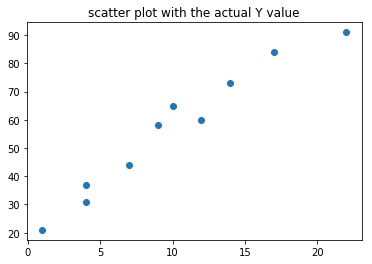

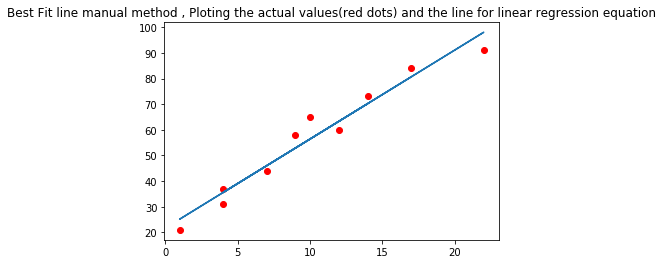

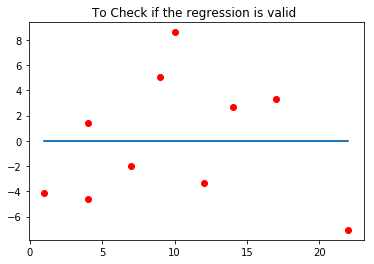

In [143]:
fig,ax = plt.subplots()
ax.set_title('scatter plot with the actual Y value')
plt.scatter( x , y )
fig,ax = plt.subplots()
ax.set_title('Best Fit line manual method , Ploting the actual values(red dots) and the line for linear regression equation')
plt.scatter( x , y ,color = 'red')
plt.plot( x , y_pred )
fig,ax = plt.subplots()
ax.set_title('To Check if the regression is valid ')
plt.scatter( x , y - reg.predict(x) , color ='red')
plt.plot( x , x*0 )